# Darstellung von quadratischen Funktionen

Sollen quadratische Funktionen in einem Diagramm dargestellt werden, so muss für die $x$-Achse ein geeignetes Intervall festgelegt werden. Dazu gibt es verschieden Möglichkeiten:

- Durch die Aufgabenstellung kommt nur ein bestimmtes Intervall in Frage. Soll zum Beispiel die Querschnittsfläche
  von Rohrleitungen als Funktion des Durchmessers dargestellt werden, so ist
  
  $$ 
    0 \le x \le d_\text{max}
  $$
  
  sinnvoll, wobei $d_\text{max}$ der maximale Durchmesser ist, der in diesem Diagramm auftritt.
- Durch die Aufgabenstellung wird kein konkretes Intervall vorgegeben. Dann versucht man, die interessanten
  Eigenschaften der Funktion in dem Diagramm zu zeigen. Das können z.B.
  
  - Die Schnittpunkte mit der $x$-Achse und der Schnittpunkt mit der $y$-Achse,
  - der Scheitelpunkt
  
  sein.
  
- Häufig wird die unabhängige Variable nicht mit $x$ bezeichnet, sondern hat einen anderen Namen. Soll ein Plot 
  dargestellt werden, so wird in `pandas` trotzdem der Name `x` für die unabhängige Variable verwendet.

In diesem Notebook lernen Sie einige Befehle kennen, die das Arbeiten erleichtern können:

- **expr.coeff()** Diese Methode ermöglicht es Ihnen, Koeffizienten einer Funktion zu ermitteln
  Der Aufruf dieser Methode lautet
  `expr.coeff(x,n=1,right=False)`<br>
  Dieser Aufruf gibt den Koeffizienten `x**n` im Ausdruck `expr` zurück. 
  
  Der Parameter `right=False` ist z.B. für Matrizen wichtig und muss hier nicht beachtet werden.
  
- **Eq()** Diese Funktion stellt eine Gleichung (equal relation) dar. <br>
  Der Aufruf lautet<br>
  `Eq(linke_Seite, rechte_Seite=0)`<br>
  und repräsentiert die Gleichung<br>
  $\text{linke_Seite} = \text{rechte_Seite}$<br>
  
  Gleichungen lassen sich mit verschiedenen Funktionen lösen. Empfohlen wird die Funktion
  
  `solveset(f, symbol=None, domain=S.Complexes)`
  
  Dabei ist `f` eine Gleichung oder ein Ausdruck, der dann zu 0 gesetzt wird. 
  Treten in einem Ausdruck mehrere Variablen auf, so muss eine Variable ausgewählt werden, 
  nach der die Gleichung aufgelöst wird.
  
  Bei Gleichungen höheren Grades können komplexe Zahlen auftreten. Will man diese ausschließen, 
  so ist `domain=S.Reals` anzugeben.
- **ax.scatter()** Diese Mehode kann genutzt werden, um auf einen Subplot `ax` einen einzelnen Punkt
  oder eine Liste von Punkten auszugeben. 
  
  Der Aufruf lautet<br>
  `ax.scatter(x,y,s,c,...)`<br>
  
  Dabei ist `x` und `y` die Punkte, `s` (shape) die Form und `c`(color) die Farbe. 
  
  Werden `s` und `c` nicht angegeben, so werden Standardwerte gewählt.


## Beispiel:

Stellen Sie die Funktion

$$
  f(z) = 3\,z^2 - 5\,z + 9
$$

im Intervall $z_s-3 \le z \le z_s+3$ dar, wobei $z_s$ der Scheitelpunkt der Parabel ist.

Hier wird zunächst die Funktionsvariable `z` definiert und die Funktion erzeugt. Dazu sind einige Importe nötig:

In [1]:
from sympy import *
init_printing()

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import pandas as pd
import numpy as np

from fun_expr import Function_from_Expression as FE

In [2]:
z = Symbol('z')

f = FE(z, 3*z**2 - 5*z + 9,name='f')
f.equation()

<IPython.core.display.Math object>

In diesem Fall sind die Koeffizienten $a=3$, $b=-5$ und $c=9$ bekannt und können leicht in die Formel

`z_s = -b/(2*a)` 

für den Scheitelpunkt eingegeben werden. Häufig sind diese aber durch eine Berechnung ermittelt worden. Deshalb muss man die Koeffizienten der Funktion `f` entnehmen können. Das geht mit der Methode `expr.coeff()`. Diese Methode ermöglicht es, beliebige Koeffizienten einer beliebigen Variablen zu ermittlen:

In [3]:
a = f.expr.coeff(z,2) # Koeffizient der Variablen z**2 von f.expr
b = f.expr.coeff(z,1) # Koeffizient der Variablen z von f.expr
c = f.expr.coeff(z,0) # Konstantes Glied bzgl. der Variablen z von f.expr

(a,b,c)

Deshalb lässt sich der Scheitelpunkt einfach mittels der Formel

`z_s = -f.expr.coeff(z,1)/(2*f.expr.coeff(z,2))`

berechnen:

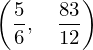

In [4]:
z_s = -f.expr.coeff(z,1)/(2*f.expr.coeff(z,2))
y_s = f(z_s)

(z_s,y_s)

Die Schnittpunkte mit der $x$-Achse ermittelt man durch Lösen der quadratischen Gleichung

\begin{align}
  f(z)&= 0\\
  3\,z^2 -5\,z + 9 &= 0
\end{align}

In [5]:
eq = Eq(f(z),0)
eq

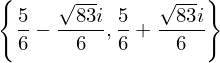

In [6]:
lsg = solveset(eq)
lsg

In diesem Fall existieren keine Schnittpunkte mit der $z$-Achse. Das erkennt man daran, dass die Lösung *komplexe* Zahlen enthält, die durch den Faktor $i$ gekennzeichnet sind. Sollen solche *komplexen* Lösungen nicht angezeigt werden. so schreibt man

In [7]:
lsg = solveset(eq,domain=S.Reals)
lsg

Die Lösung wird als Menge von Elementen zurückgegeben. Wenn es keine Lösungen gibt, so enthält diese Menge keine Elemente. Man spricht von einer leeren Menge, in Zeichen: $\emptyset$. Diese Parabel schneidet die $z$-Achse nicht.

Um den Ausdruck in einem Diagramm darzustellen, wird `matplotlib` mit `numpy` benutzt:

In [8]:
d = 3
lz = np.linspace(float(z_s)-d,float(z_s)+d)

df = pd.DataFrame(
    {
        'z': lz,
        'y': f.lambdified(lz)
    }
)

df.head()

,z,y
0,-2.166667,33.916667
1,-2.044218,31.757566
2,-1.921769,29.688428
3,-1.799320,27.709253
4,-1.676871,25.820040


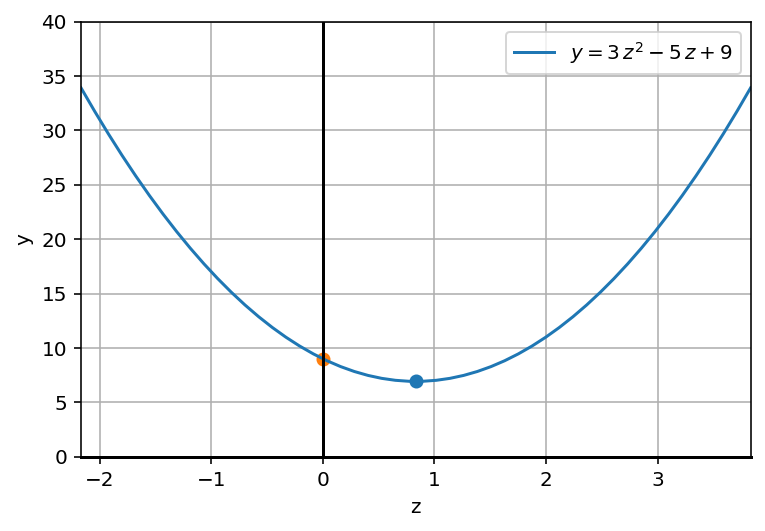

In [9]:
ax = df.plot(
    x='z', # Achtung: pandas / matplotlib nennt die unabhängige Variable x
    y='y',label=f'$y=3\,z^2 - 5\,z + 9$',
    grid=True
)

ax.scatter(z_s,f(z_s))
ax.scatter(0,f(0))

ax.set(ylim=(0,40),ylabel='y')
ax.axhline(0,c='k',clip_on=False)
ax.axvline(0,c='k')

## Aufgabe

- Stellen Sie die Funktion $f(v) = -5\,v^2 +3\,v - 26$ in einem Diagramm dar. 
  Bestimmen Sie dazu mit `sympy` den Scheitelpunkt und zeichnen Sie diesen in das Diagramm ein.

  Wählen Sie das Intervall für die $v$-Achse so, dass der Scheitelpunkt gut erkennbar ist.
  
- Bestimmen Sie die Schnittpunkte mit den Achsen des Koordninatensystems.

In [15]:
v = Symbol('v')

f = FE(v, 5*v**2 + 3*v - 26,name='f')
f.equation()

<IPython.core.display.Math object>

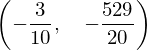

In [16]:
a = f.expr.coeff(v,2)
b = f.expr.coeff(v,1)
c = f.expr.coeff(v,0)

v_s = -b/(2*a)
y_s = f(v_s)

(v_s,y_s)

In [17]:
lv = np.linspace(-3,3)

df = pd.DataFrame(
    {
        'v': lv,
        'y': f.lambdified(lv)
    }
)

df.head()

,v,y
0,-3.000000,10.000000
1,-2.877551,6.768846
2,-2.755102,3.687630
3,-2.632653,0.756352
4,-2.510204,-2.024990


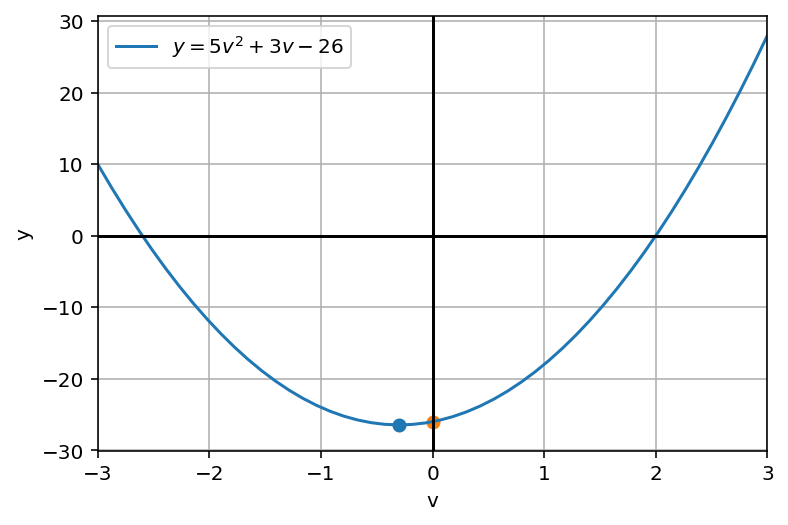

In [18]:
ax = df.plot(
    x='v',
    y='y', label=fr'$y={latex(f.expr)}$',
    grid=True
)

ax.scatter(v_s,y_s)
ax.scatter(0,f(0))
ax.set(xlabel='v',ylabel='y')

ax.axhline(0,c='k')
ax.axvline(0,c='k')

Der Graph $y=f(v)$ zeigt, dass es zwei Schnittpunkte mit der $v$-Achse gibt. Diese können mit `sympy` berechnet werden:

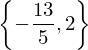

In [29]:
Nullstellen = solveset(Eq(f(v),0),domain=S.Reals)
Nullstellen

In [33]:
x_n = list(Nullstellen)
y_n = [f(x) for x in x_n]

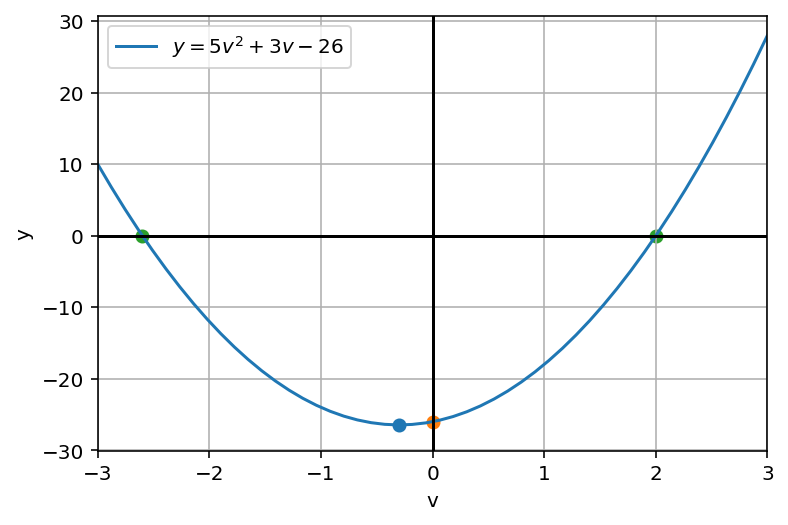

In [34]:
ax = df.plot(
    x='v',
    y='y', label=fr'$y={latex(f.expr)}$',
    grid=True
)

ax.scatter(v_s,y_s)
ax.scatter(0,f(0))
ax.scatter(x_n,y_n)
ax.set(xlabel='v',ylabel='y')

ax.axhline(0,c='k')
ax.axvline(0,c='k')